# Data analysis goals / approaches

## Statistics

**Goal:** characterize the data-generating process, either by estimating meaningful parameters in a theoretically motivated model structure, or by picking among such models.

**Important:** Model structure, parameter estimates.  

**Not emphasized:** Predictive performance.

So, statistics is deeply concerned with estimating model parameters (i.e., the mean of a group), estimating the error of those estimates (i.e., standard error of the mean), putting confidence intervals on those estimates, asking whether a particular model might be inconsistent with the data (i.e., null hypothesis significance testing), and choosing among competing theoretical models (i.e., model selection/comparison).

## Supervised machine learning


**Goal:** get a computer to do something useful by learning what useful behavior looks like from examples.  

**Important:** Loss function and evaluation of predictive performance.  

**Not emphasized:** Model structure and parameter estimates. 

So supervised machine learning focuses on algorithms that can efficiently learn and  generalize complicated behavioral functions.  The most effective algorithms often have internal representations that are inscrutable and uninterpretable.  Model structure is relevant insofar as it determines what kinds of behavioral functions can be learned at all, or more easily.


# Supervised Machine Learning

### Processes / steps

#### Specifying the problem / goals

**What's the goal?**  (e.g., we want to predict how much two people would like dating each other.)  

**What's the loss function?**  How do we quantify success? (e.g., MSE on log duration of relationship)  

#### Getting data

**Where can we find data to learn from?**  We need training examples for which we have some information we want to use to predict from, as well as the label/value we want to predict.  (e.g., we need data on how long relationship that started on our platform have lasted)


**What kind of information can we use to make these predictions?**  This information needs to be available both in the training data, and in the examples we want to make predictions for.  (e.g., the dating profiles they filled out, their photos, their geographic region and the other folks in that region)

#### Feature extraction / engineering

#### Model selection / fitting






# scikit learn

Is a python package with a whole bunch of common machine learning algorithms, tools, and functions built in.

[getting started guide](https://scikit-learn.org/stable/getting_started.html)

by convention, we do not import all of the `sklearn` library, but instead just import the bits we need.  As you an see from the full [user guide](https://scikit-learn.org/stable/user_guide.html) the library is enormous, so importing the whole thing would be quite wasteful of computer memory.

bits we may need are in:

`sklearn.{model}` where {model} is some type of model class.  From here we import specific model classes.  Roughly comparable to the SimpleRegression class we implemented last week.

`sklearn.metrics` which includes various loss functions and means of evaluating model performance.

`sklearn.model_selection` which includes various helper functions for choosing models, or tuning 'hyperparameters'

`sklearn.datasets` which includes data sets and functions for loading them.

and more.  


# Classification

## Problem statement

This is a *supervised* learning problem, meaning that we start with some examples of what kind of behavior we *want*.

We start with some labeled examples.  

Labels are categorical. 

An example is summarized as a set of "features" (variables, values, properties, attributes).  These features are numerical variables.  An example is a *row* of our data.  features are *columns* of our data.  The labels are another column of the data.

We want an algorithm that could predict the label of a new example, given its features.

Examples: predict whether someone will default on their loan (yes/no label), predict whether a picture contains a cat (yes/no cat label), predict what kind of pet is in the picture (cat/dog/hamster/frog label), predict how someone will vote, etc.


### Useful distinctions:

**Binary** classification: predicting a label that can take on two values (yes/no, cat/not-cat, correct/incorrect, success/failure, etc.)

**Multiclass** classification: predicting a label that can take on more than two values (cat/dog/hamster/lizard, white/black/asian/hispanic/other, democrat/republican/libertarian/green/other, etc.)

**Multilabel** classification: predicting which set of labels applies to a given example.  For instance a picture could contain a cat, a dog, a person, a car, etc, these are not mutually exclusive.  Multilabel classification amounts to choosing which set of labels applies.   We can think of this as a bunch of binary classification problems (for each possible label, does it apply or not?), or one gigantic multi-class classification problem (in which each combination of labels is a distinct class).  

**Model-based** vs **instance-based**: usually a continuum, but worth thinking about.  Maybe more useful to think about number of parameters: scales with features, or scales with with examples.

**Generative** vs **Discriminative**



## Quick Example

Classifying legendary pokemon.

In [1]:
import matplotlib.pyplot as plt
plt.rc('font', size=16)

In [2]:
import pandas as pd
import numpy as np
poke = pd.read_csv('Pokemon.csv')
poke

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


## K nearest neighbors

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [4]:
X = np.matrix(poke.loc[:,'HP':'Generation'])
y = np.array(poke['Legendary'])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    train_size = 0.75, 
                                                    random_state=0)
# note, random_state provided to yield consistent behavior over runs

In [6]:
nn_3 = KNeighborsClassifier(3)
nn_3.fit(X_train, y_train)
y_test_prediction = nn_3.predict(X_test)

In [7]:
accuracy_score(y_test, y_test_prediction)

0.93

## Evaluating classification performance 

**metrics and loss functions**

There are many.  Consider the sklearn [built-in ones](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)

There are a few things to consider when choosing a metric to evaluate performance:

**Baserates, and imbalanced classification problems:**  for some problems, the classes are *imbalanced*, meaning that some classes occur much more often than others.  For instance, the vast majority of credit card transactions are *not* fraudulent.  Such imbalanced classification problems present all sorts of challenges, but one of them is how to measure performance.  In such cases, if I always predict that credit card transactions are not fraudulent (and never label a transaction as fraud) I might achieve 99% accuracy, without even trying.  Not all metrics are suitable for such cases.

**Actual costs and benefits:** for many real-world problems, our true costs and benefits do not scale with accuracy.  For instance, if classifying xray images as cancerous or benigh, the cost of misclassifying cancer as benign is much higher than the cost of misclassifying a benign tumor as cancerous.  However, these are then scaled by the *baserates* of cancer in the set of data we want to classify.  In general, we must consider the costs of different kind of errors, and their baserates, to measure the goodness of classification performance that drives real decisions.

### Hard classification

Hard classification yields predicted labels directly.  For instance, I am trying to predict whether a given loan will fail to be paid back (defaulted), and my predictions are of the form 'default', or 'no default'.

#### Confusion matrix

The [binary confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) is the basis of many metrics measuring binary classification performance.

a confusion matrix contingency table considers the frequency with which each combination of true, and predicted, labels occurred.

In [8]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_prediction, labels=[True, False])

array([[  8,  10],
       [  4, 178]])

In [9]:
pd.DataFrame(confusion_matrix(y_test, y_test_prediction, labels=[True, False]),
            index=[['True', 'True'], ['Legendary', 'Not']],
            columns=[['Predicted', 'Predicted'], ['Legendary', 'Not']])

Predicted     
               Legendary  Not
True Legendary         8   10
     Not               4  178

##### Reading a confusion matrix

From this we can quickly see that:  

- there were 18 legendary pokemon in the test data, and 182 not-legendary pokemon.  

- so the classification problem is very much imbalanced (there are very few legendary pokemon)   

- our classifier predicted a legendary label 12 times, and a not-legendary label 188 times.

- our overall **accuracy** is 186 out of 200.  Quite high (93%) largely because of the imbalance.

From this we can consider a bunch of different conditional probabilities.  Each of these has fancy terms, and many of these terms vary across fields, even though they refer to the same thing)

##### Measures that condition on true values

Conditioning on the **true value** being **positive**: of all the pokemon that were truly *legendary*, how did we classify them?

- our **false negative rate** is pretty high -- we frequently (10/18 times) fail to label a legendary pokemon as legendary.  (this is also called *miss rate* or *type II error rate*)

- this means that our **true positive rate** is fairly low (8/18 times) -- of the 18 truly legendary pokemon, we labeled 8 of them as legendary.  (this is also called *recall* or *sensitivity* or *hit rate* or *power* in different fields)


Conditioning on the **true value** being **negative**: of all the pokemon that were truly *not legendary*, how did we classify them?

- our **false positive rate** is low, meaning we rarely (4/182 times) label a not-legendary pokemon as legendary. (this is also called *false alarm rate* or *type I error rate*)

- this means that our **true negative rate** is high (178/182).  This is also called *specificity*, *selectivity*, or *correct rejection rate*.

##### Measures that condition on predicted labels

Conditioning on the **predicted label** being **positive**: of all the pokmeon we *labeled* as legendary, what were they really?

- Our **positive predictive value** is pretty high (8/12) of the 12 times we predicted a *legendary* label, we were right 8 times.  This is also called **precision**.

- Correspondingly, our **false discovery rate** is not too high (4/12).

Conditioning on the **predicted label** being **negative**: of all the pokemon we *labeled* as not legendary, what were they really?

- Our **negative predictive value** is high (178/188), and 

- Our **false omission rate** is low (10/188)

#### Overall Metrics 

The confusion matrix is usually summarized into a single number to capture overall performance.

For balanced problems, we can simply talk about **accuracy**

For imbalanced problems, it is more common to use something like **F1 score** or **matthews correlation coefficient**, or **balanced accuracy**, etc.  These are just different ways of combining the conditional probabilities from the confusion matrix into a single number, to not overweight the frequent class.

### Soft predictions and thresholds

Many classification algorithms yield *soft* predictions.  Such as a probability, or a propensity score.  So instead of simply predicting whether a given example ought to be classified as 'legendary' or 'not legendary', the classifier might yield a single score, where higher scores indicate 'more likely to be legendary', and lower scores indicate 'less likely to be legendary'.

For the 3-nearest-neighbor classifier we trained earlier, these soft predictions correspond to the proportion of the 3 neighbors that voted for 'legendary'.   i.e., 0/3, 1/3, 2/3, or 3/3.

Text(0, 0.5, 'frequency')

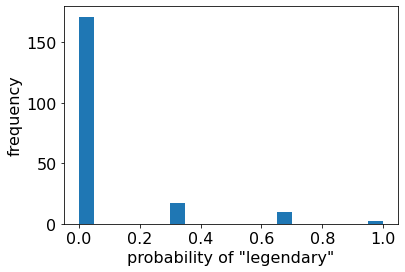

In [10]:
plt.hist(nn_3.predict_proba(X_test)[:,1], bins=20)
plt.xlabel('probability of "legendary"')
plt.ylabel('frequency')

For other classifiers, these might be much more graded:

Text(0, 0.5, 'frequency')

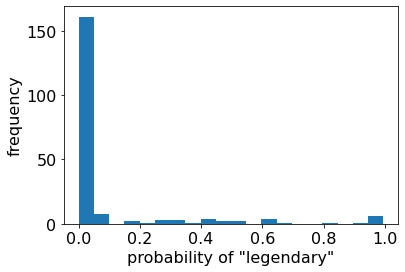

In [11]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)
plt.hist(clf.predict_proba(X_test)[:,1], 20)
plt.xlabel('probability of "legendary"')
plt.ylabel('frequency')

#### Thresholds

If we have soft predictions, we can pick different *thresholds* for how to make *hard* label predictions from the soft scores.  For instance, should we predict that a pokemon is "legendary" if the score we predict is 0.6?  What about 0.8?  

We typically pick a *threshold*.  So we will call "legendary" every pokemon for which we predict a probability of legendary that is higher than the threshold.

If we have a **lower threshold** like 0.25, that means that we will  

- label more pokemon as "legendary".   
- have a higher **true positive rate** (and lower false negative rate)   
- have a higher **false positive rate** (and lower true negative rate)    
- have 

If we have a **higher threshold** like 0.75, that means that we will...   

- label fewer pokemon as "legendary" (more negatives).   
- have a higher **false negative rate** (and lower true positive rate)   
- have a higher **true negative rate**  (and lower false negative rate)   

#### ROC curves

Choosing a threshold can be somewhat arbitrary, and will influence all our confusion-matrix based scores.  In general, when we choose a threshold, we will want to consider costs of different kinds of errors.  

However, we may want to figure out how well our classifier is doing before we pick a threshold.  How good is it at separating the different classes?

To do so, it is common to consider the full "receiver operating characteristic" curve, which describes how the true positive rate, and false positive rate change for different thresholds

(array([15., 18.,  0., 11.,  0., 16., 10.,  0., 15., 15.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

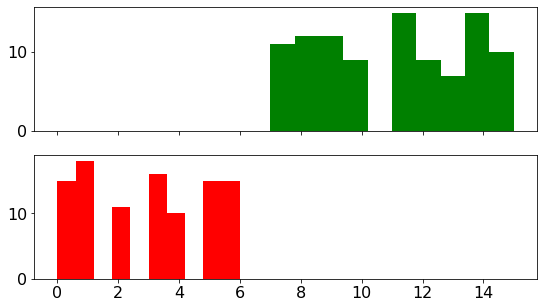

In [12]:
from random import randint

def generate_positive():
    return randint(7, 15)

def generate_negative():
    return randint(0, 6)

fig, axs = plt.subplots(2,1, figsize = (9,5), sharex=True)
axs[0].hist([generate_positive() for _ in range(100)], color='green')
axs[1].hist([generate_negative() for _ in range(100)], color='red')

Text(0, 0.5, 'True positive rate')

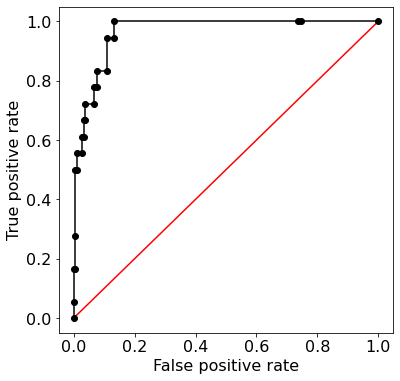

In [13]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])

plt.figure(figsize = (6,6))
plt.plot([0, 1], [0, 1], 'r-')
plt.plot(fpr, tpr, 'ko-')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')


How to read this?

- very high thresholds are in the lower left corner (where we set the threshold so high, that we never choose to label a pokemon as "legendary", and thus have low true and false positive rates.)

- very low thresholds are in the upper right corner

- chance performance would fall on the diagonal, if we had totally random, unpredictive, scores, then true and false positive rates would be matched.

- perfect performance would be a function that starts at (0,0), goes to (0,1), and then to (1,1).  Meaning that there is a threshold at which we get 0 false positives, and 100% true positives.  

So the further our curve is from the diagonal toward the upper left corner, the better our classifier is doing.

Text(0, 0.5, 'True positive rate')

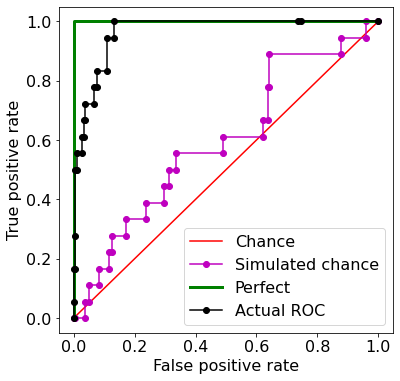

In [14]:
plt.figure(figsize = (6,6))
plt.plot([0, 1], [0, 1], 'r-')

fpr, tpr, thresholds = roc_curve(y_test, np.random.random(len(y_test)))
plt.plot(fpr, tpr, 'mo-')

fpr, tpr, thresholds = roc_curve(y_test, y_test)
plt.plot(fpr, tpr, 'g-', linewidth=3)

fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, 'ko-')

plt.legend(['Chance', 'Simulated chance', 'Perfect', 'Actual ROC'])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')


#### Metrics for soft predictions.

Area under the ROC  `sklearn.metrics.roc_auc_curve()`.

log loss / logistic loss / cross entropy loss

## Classifiers in scikit learn

They are all generally packaged as classes, roughly like the one we coded up for SimpleRegression.   

They have some initialization parameters (describing the core assumptions of the model), they have a `fit` method, to estimate parameters, and they have a `predict` method to generate predicted labels.  

## Classifier types

### **K-nearest-neighbor** / **kNN**: 

consider the k *closest* neighbors from the training set to the new data point, and have them vote on a label.

### **Decision tree**

Build a tree of binary decisions of the form "feature X >= threshold", so as to separate the classes.

In [15]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

# max_depth

dt = DecisionTreeClassifier(max_depth = 2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

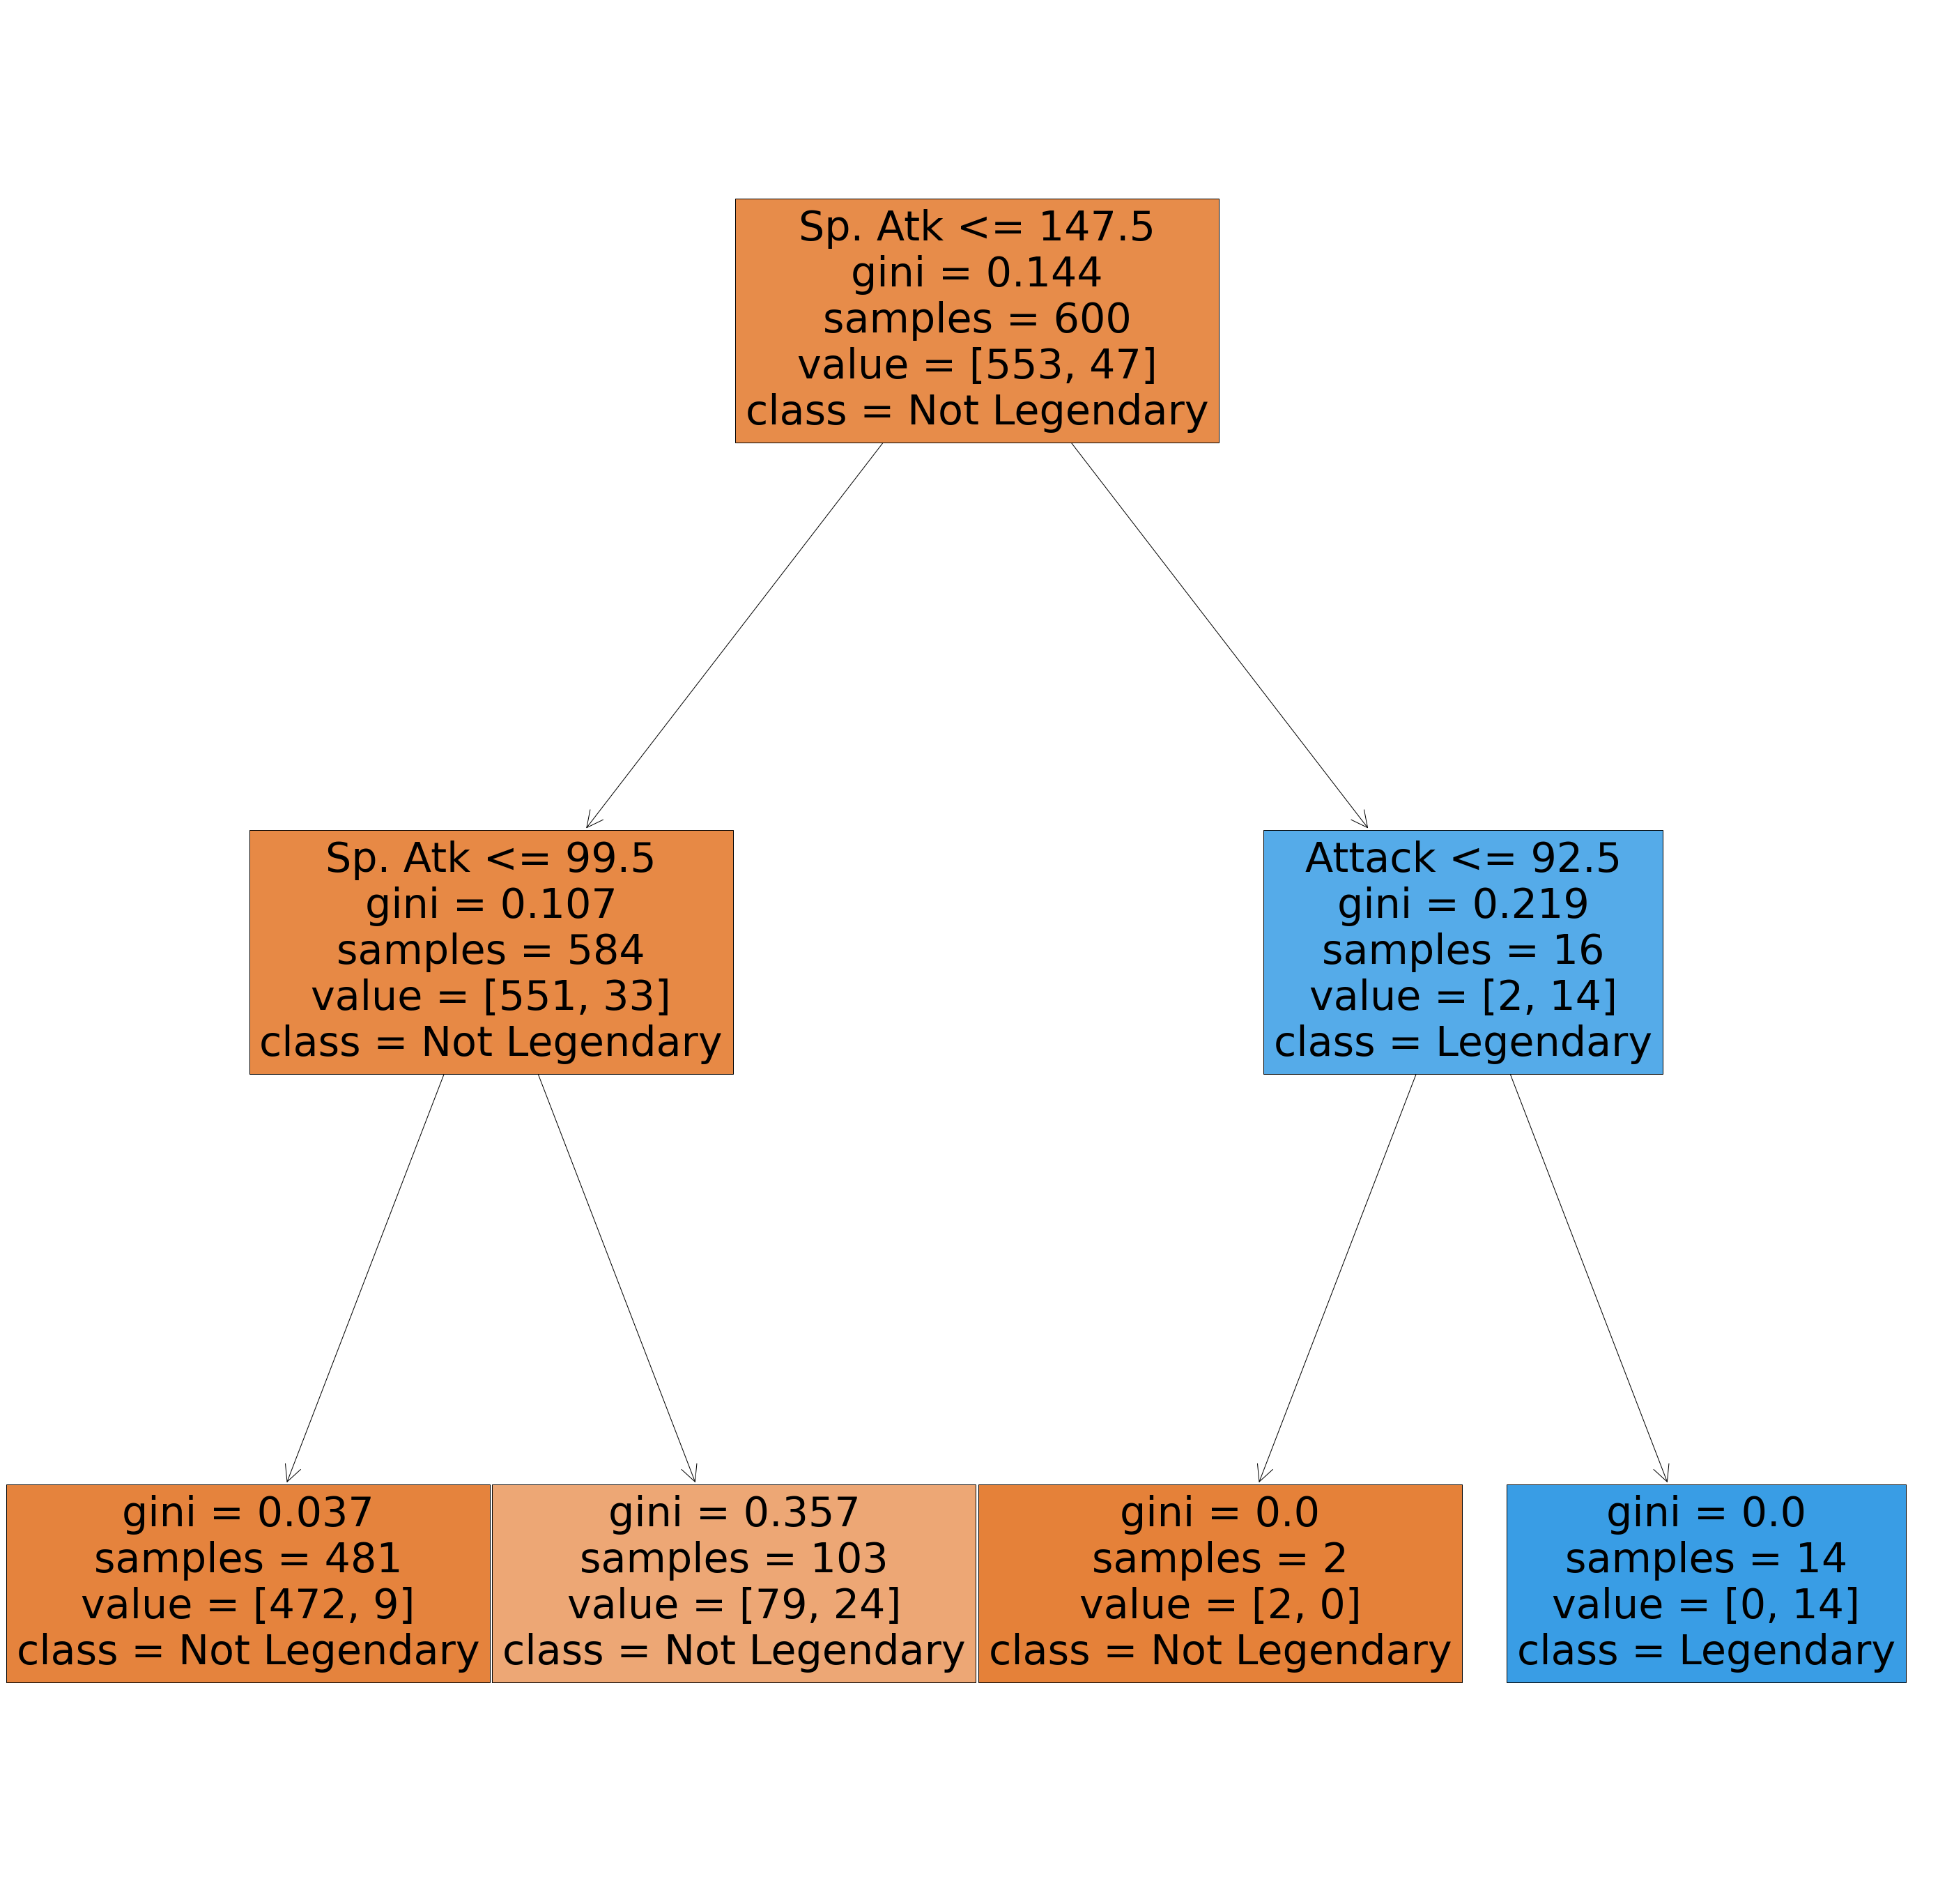

In [16]:
fig = plt.figure(figsize = (50,50))
_ = tree.plot_tree(dt, 
                   feature_names = poke.loc[:,'HP':'Generation'].columns,
                  class_names = ['Not Legendary', 'Legendary'],
                  filled = True)

In [17]:
X = poke[['Sp. Atk','Attack']]
y = poke['Legendary']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    train_size=0.75)

In [19]:
dt = DecisionTreeClassifier(max_depth = 8)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8)

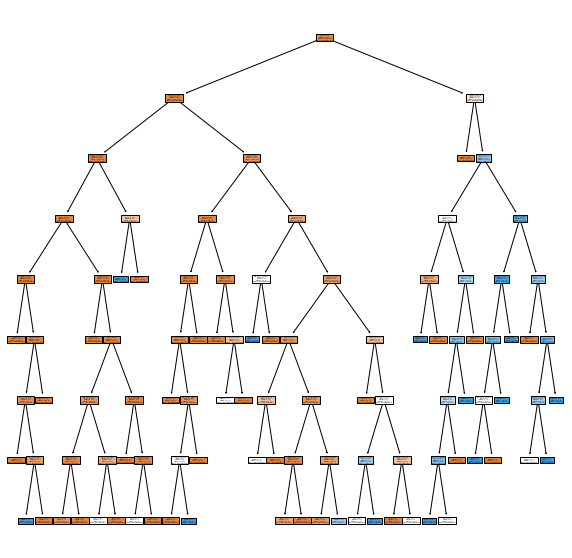

In [20]:
fig = plt.figure(figsize = (10,10))
_ = tree.plot_tree(dt, 
                   feature_names = X_train.columns,
                  class_names = ['Not Legendary', 'Legendary'],
                  filled = True)

In [21]:
data = {'Sp. Atk':[],
        'Attack':[]}
for spatk in np.linspace(min(X['Sp. Atk']), max(X['Sp. Atk']), 100):
    for atk in np.linspace(min(X['Attack']), max(X['Attack']), 100):
        data['Sp. Atk'].append(spatk)
        data['Attack'].append(atk)

df = pd.DataFrame(data)

Text(0, 0.5, 'Attack')

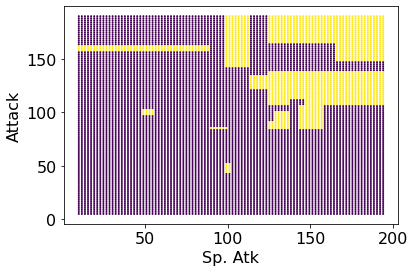

In [22]:
plt.scatter(df['Sp. Atk'], df['Attack'], s=1, c=dt.predict(df))
plt.xlabel('Sp. Atk')
plt.ylabel('Attack')